<a href="https://colab.research.google.com/github/MariamKhan98/mariamkhan98/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#to implement PCA wwe need to change the sscale of the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, = train_test_split(df, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


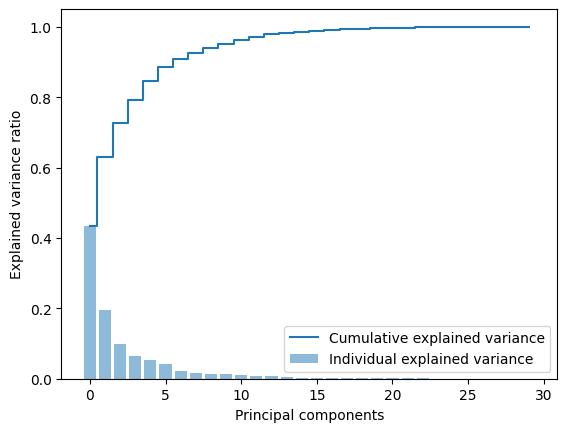

In [6]:
pca  = PCA()

X_train_pca = pca.fit_transform(X_train_std)
exp_var = pca.explained_variance_ratio_
cum_sum_eigenvalue = np.cumsum(exp_var)

plt.bar(range(0, len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalue)), cum_sum_eigenvalue, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [7]:
pca.components_

array([[ 2.16014846e-01,  1.01699596e-01,  2.25181465e-01,
         2.18534830e-01,  1.48981569e-01,  2.40835871e-01,
         2.59499690e-01,  2.63324252e-01,  1.46217348e-01,
         6.57406649e-02,  2.03918546e-01,  2.34543987e-02,
         2.09023919e-01,  1.99502970e-01,  2.15718507e-02,
         1.65762530e-01,  1.49054410e-01,  1.82429814e-01,
         4.76642673e-02,  9.87533276e-02,  2.26391948e-01,
         1.05122879e-01,  2.36126297e-01,  2.24215789e-01,
         1.32347855e-01,  2.11297039e-01,  2.29556005e-01,
         2.52917161e-01,  1.27240897e-01,  1.32340793e-01],
       [-2.40040164e-01, -5.12630139e-02, -2.22160786e-01,
        -2.36489281e-01,  1.69316336e-01,  1.50134402e-01,
         6.40373456e-02, -3.96395631e-02,  1.83279546e-01,
         3.61447295e-01, -1.08859253e-01,  9.69510543e-02,
        -9.16036710e-02, -1.53645976e-01,  1.94465623e-01,
         2.37907034e-01,  2.07841771e-01,  1.43048104e-01,
         1.74509277e-01,  2.81101891e-01, -2.24547535e-